# Learn PyTorch

## Table of Content
- [Different algorithms](#algo-intro)
- [Introduction to Pytorch](#pytorch-intro)
    - [Importing modules](#import-modules)
    - [Introduction to Tensors](#tensor-intro)
        - [Creating tensors](#create-tensors)
        - [Random tensors](#random-tensors)
        - [Zeros and Ones](#zero-one-tensors)
        - [Creating Range of Tensors and Tensor-like](#tensor-range)
        - [Tensor datatypes](#tensor-datatypes)
        - [Getting information from Tensors](#getting-tensor-data)
        - [Tensor operations](#tensor-operations)
        - [Finding min, max, mean, sum of Tensors (tensor aggregation)](#min-max-mean-sum)
        - [Reshaping, Viewing, Stacking Tensors](#reshape-view-stack)
        - [Sqeezing, Unsqueezing, Permuting Tensors](#squeeze-unsqueez-permute)
        - [Indexing of Tensors](#indexing)
    - [PyTorch Tensors and NumPy](#pytorch-numpy)
    - [PyTorch Reproducibility](#reproduce)

### Machine Learning algorithms <a class="anchor" id="algo-intro"></a>
- Random forest
- Gradient boosted models
- Naive Bayes
- Nearest neighbors
- Support vector machine (SVM)
### Deep Learning algorithms
- Neural network
- Fully connected neural network
- Convolutional neural network
- Recurrent neural network
- Transformer

#### Takeaway 
- If you *CAN* solve a problem without machine learning, you *SHOULD* solve it without machine learning.
- ML is **good** when:
    - You have too many conditions to fill in traditional approach
    - Error is (somewhat) acceptable
    - Continually changing environment
- ML is **not good** when:
    - You need explanation of why the rules are the way they turn out to be
    - Error is not acceptable
    - You don't have enough data
    - Traditional approach performs better

#### Takeaway
- If you have **structured** data (organized in rows and columns), you should go for ML.
- If you have **unstructured** data (i.e., data that is not organized in columns and rows by categories: image, audio, text etc), you should go for DL. 

## Introduction to Pytorch <a class="anchor" id="pytorch-intro"></a>

Follow the installation instructions provided on the website: https://pytorch.org/get-started/locally/

### Importing modules <a class="anchor" id="import-modules"></a>

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Introduction to Tensors <a class="anchor" id="tensor-intro"></a>

#### Creating tensors <a class="anchor" id="create-tensors"></a>

Tensors are created with `torch.tensor()`

In [3]:
# scalar (dimension = 0)
scalar = torch.tensor(7)
scalar

tensor(7)

In [4]:
# get tensor back as Python int
scalar.item()

7

In [5]:
# vector (dimension = 1)
vector = torch.tensor([7, 7])

print(vector, '\n',
      vector.ndim, '\n',# dimension of vector
      vector.shape # shape of vector
     )

tensor([7, 7]) 
 1 
 torch.Size([2])


In [6]:
# matrix (dimension = 2)
MATRIX = torch.tensor([[7, 8],
                       [4, 5]])
print(MATRIX, '\n',
      MATRIX.ndim, '\n',# dimension of matrix
      MATRIX.shape # shape of matrix
     )

tensor([[7, 8],
        [4, 5]]) 
 2 
 torch.Size([2, 2])


In [7]:
# targetting rows
MATRIX[0]

tensor([7, 8])

In [8]:
# GENERAL TENSOR
TENSOR = torch.tensor([[[1, 2, 12], 
                        [3, 4, 5]],
                       
                       [[5, 7, 11], 
                        [8, 9, 10]]])
print(TENSOR, '\n',
      TENSOR.ndim, '\n',# dimension of TENSOR
      TENSOR.shape # shape of TENSOR
     )

tensor([[[ 1,  2, 12],
         [ 3,  4,  5]],

        [[ 5,  7, 11],
         [ 8,  9, 10]]]) 
 3 
 torch.Size([2, 2, 3])


#### Random Tensors <a class="anchor" id="random-tensors"></a>
Random tensors are important because the way many neural networks works is that they start with tensors full of random numbers and then adjust the random numbers.

`Start with random numbers --> look at data --> update random numbers --> look at data --> ...`

In [9]:
# random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.3976, 0.0226, 0.0139, 0.2735],
        [0.7215, 0.3391, 0.7923, 0.6361],
        [0.2002, 0.3363, 0.0900, 0.0730]])

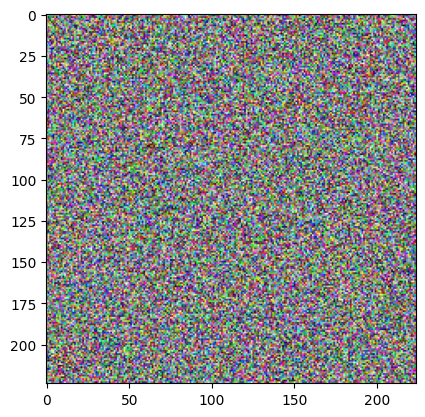

In [10]:
# example: a random tensor with same shape as an image
random_image_tensor = torch.rand(size=(224,224,3)) # height, width, color channel
plt.imshow(random_image_tensor) # handy way of visualizing images

#### Zeros and Ones <a class="anchor" id="zero-one-tensors"></a>
Useful way of creating tensors with zeros or ones. Handy when creating Masks.

In [11]:
# creating a tensor of all zeros
zeros = torch.zeros(3, 4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [12]:
# creating a tensor of all ones
ones = torch.ones(3, 4)
print(ones, ones.dtype) # dtype -> data type of the tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) torch.float32


#### Range of tensors and tensor-like <a class="anchor" id="tensor-range"></a>
- `torch.arange(start, end, step)`: Tensor of a range of values

- `torch.zeros_like(another_tensor)`: Create a tensor of zeros, of the same shape as `another_tensor`. Useful when the shape of `another_tensor` is not known.

- `torch.ones_like(another_tensor)`: Create a tensor of ones, of the same shape as `another_tensor`. 

- `torch.rand_like(another_tensor)`: Create a tensor of random numbers, of the same shape as `another_tensor`. 

In [13]:
# using torch.range(), will depricate soon
torch.range(0, 5)

C:\Users\faiya\AppData\Local\Temp\ipykernel_13544\1018601.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(0, 5)


tensor([0., 1., 2., 3., 4., 5.])

In [14]:
# using torch.arange()
torch.arange(1, 11, 2)

tensor([1, 3, 5, 7, 9])

In [15]:
# Creating tensors like
another_tensor = torch.rand(3, 4)
like_zeros = torch.zeros_like(another_tensor)
like_zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [16]:
another_tensor = torch.rand(3, 4)
like_ones = torch.ones_like(another_tensor)
like_ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [17]:
another_tensor = torch.rand(3, 4)
like_zeros = torch.rand_like(another_tensor)
like_zeros

tensor([[0.8811, 0.4521, 0.1986, 0.5479],
        [0.0149, 0.1350, 0.1443, 0.6496],
        [0.9539, 0.1767, 0.3979, 0.7973]])

#### Tensor Datatypes <a class="anchor" id="tensor-datatypes"></a>

See available datatypes: https://pytorch.org/docs/stable/tensors.html
> **Note:** Tensor datatypes are one of the 3 big errors you'll run into with PyTorch and deep learning:
> 1. Tensors are not of right datatype
> 2. Tensors are not of right shape
> 3. Tensors are not on the right device

In [18]:
float_32_tensor = torch.tensor([3.0, 2.0, 1.4],
                              dtype=torch.float32, #data type of the tensor, default=None
                              device="cpu", # device on which the operations are running, default="cpu"
                               # could use "cuda" with nvidia gpu :((
                              requires_grad=False # whether or not to track the gradience of this tensor operations)
                              )
print(float_32_tensor, '\n',
      float_32_tensor.dtype)

tensor([3.0000, 2.0000, 1.4000]) 
 torch.float32


In [19]:
# change datatype of the tensors
float_16_tensor = float_32_tensor.type(torch.half) # torch.float16 == torch.half
print(float_16_tensor, '\n',
      float_16_tensor.dtype)

tensor([3.0000, 2.0000, 1.4004], dtype=torch.float16) 
 torch.float16


#### Getting information from Tensors <a class="anchor" id="getting-tensor-data"></a>
1. Get the datatype of the tensor: `tensor.dtype`
2. Get the shape of the tensor: `tensor.shape`
3. Get the device of the tensor: `tensor.device`

#### Tensor operations <a class="anchor" id="tensor-operations"></a>
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [20]:
# addition
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [21]:
# subtraction
tensor - 5

tensor([-4, -3, -2])

In [22]:
# multiplication (element-wise)
# tensor * 2 # works
torch.mul(tensor, 2)

tensor([2, 4, 6])

In [23]:
# division
tensor / 2

tensor([0.5000, 1.0000, 1.5000])

In [24]:
#matrix multiplication
mult = torch.tensor([[2], [4], [5]])
print(tensor.shape, mult.shape)

torch.matmul(tensor, mult) # gives the dot product
# tensor @ mult # gives the same result

# torch.mm(tensor, mult) 



torch.Size([3]) torch.Size([3, 1])


tensor([25])

In [25]:
torch.matmul(torch.rand(1, 3), torch.rand(3, 1))

tensor([[0.6338]])

> **Note:** `torch.mm()` *does not broadcast* (whatever that means). As far as I understand, it probably means that `torch.mm()` does matrix multiplication and expects the matrices to be of compatible ~shapes~ dimensions, otherwise the multiplication won't work.
> `torch.matmul()` *does broadcast*, so it can multiply even if the ~shapes~ dimensions aren't compatible.

In [26]:
# transposing matrices -> tensor.T (deprecated for 2D tensors), tensor.mT (for 2D tensors)
tensor.T

C:\Users\faiya\AppData\Local\Temp\ipykernel_13544\1032603665.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3679.)
  tensor.T


tensor([1, 2, 3])

#### Finding min, max, mean, sum of Tensors (tensor aggregation) <a class="anchor" id="min-max-mean-sum"></a>

In [27]:
x = torch.arange(0, 100, 10, dtype=torch.float32)

# min, max, mean, sum
torch.min(x), torch.max(x), torch.mean(x), torch.sum(x) # torch.___(tensor) methods
x.min(), x.max(), x.mean(), x.sum() # tensor.___() methods

(tensor(0.), tensor(90.), tensor(45.), tensor(450.))

> **Note:** min, max, mean, sum only work on tensors of `float` or `complex` dtypes. Other datatypes have to be converted into one of these.

In [28]:
# positional min and max of a tensor
x.argmin(), x.argmax() # gives the index of min/max

(tensor(0), tensor(9))

#### Reshaping, Viewing, and Stacking Tensors <a class="anchor" id="reshape-view-stack"></a>
* Reshaping: reshape a tensor to a new shape
* Viewing: return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking: combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeezing: removes all `1` dimensions from a tensor
* Unsqueezing: adds a `1` dimension to a target tensor
* Permute: returns a view of the input with dimensions permuted (swapped) in a certain way

In [29]:
# reshaping
x_reshaped = x.reshape(2, 5)
x_reshaped

tensor([[ 0., 10., 20., 30., 40.],
        [50., 60., 70., 80., 90.]])

> **Note:** shape must be compatible with the number of elements

In [30]:
# viewing (only shows the new shaped tensor, doesn't actually reshapes it)
z = x.view(5, 2) # z and x share the same memory. changing z will cange x.
z[:, 0] = 5
z, x

(tensor([[ 5., 10.],
         [ 5., 30.],
         [ 5., 50.],
         [ 5., 70.],
         [ 5., 90.]]),
 tensor([ 5., 10.,  5., 30.,  5., 50.,  5., 70.,  5., 90.]))

In [40]:
# stacking tensors on top of each other
x_stacked = torch.stack([x, x], dim=1)
x, x_stacked, x_stacked.shape

(tensor([ 5., 10.,  5., 30.,  5., 50.,  5., 70.,  5., 90.]),
 tensor([[ 5.,  5.],
         [10., 10.],
         [ 5.,  5.],
         [30., 30.],
         [ 5.,  5.],
         [50., 50.],
         [ 5.,  5.],
         [70., 70.],
         [ 5.,  5.],
         [90., 90.]]),
 torch.Size([10, 2]))

> **Note:**
> - `dim=0`: Vertical stacking (`torch.vstack([x, x])`)
> - `dim=1`: Horizontal stacking (`torch.hstack([x, x])`) *(not sure)*

#### Squeezing, Unsqueezing, Permuting of Tensors <a class="anchor" id="squeeze-unsqueez-permute"></a>
- Squeezing: removes all 1-Dimensions from a tensor (e.g., `shape[2, 1, 1, 3]` -> `shape[2, 3]`)
- Unsqueezing: adds a 1-Dimension to a target tensor at a target dimension, default: `dim=0`. (e.g., `shape[2, 3]` -> `shape[1, 2, 3]`)
- Permuting: returns an image of a target tensor with the shape rearranged (e.g., `shape[1, 2, 3]` -> `shape[2, 1, 3]`)

In [48]:
# squeezing: removes all 1-dimensions in the tensor
y = torch.zeros(2, 1, 1, 3)
y_squeezed = y.squeeze() # gets rid of 1-dimensions
y_squeezed, y_squeezed.shape

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 torch.Size([2, 3]))

In [47]:
# unsqueezing: add a single dimension to a target tensor at a specific dimension
y_unsqueezed = y_squeezed.unsqueeze(dim=0)
y_unsqueezed, y_unsqueezed.shape

(tensor([[[0., 0., 0.],
          [0., 0., 0.]]]),
 torch.Size([1, 2, 3]))

In [55]:
# permute: returns a view of a target tensor with the dimensions rearranged
y_permuted = torch.permute(y, dims=(1, 0, 3, 2))
print(f"Previous tensor: {y}", f"Permuted tensor: {y_permuted}", 
      f"\nPrevious shape: {y.shape}", f"New shape: {y_permuted.shape}")

Previous tensor: tensor([[[[0., 0., 0.]]],


        [[[0., 0., 0.]]]]) Permuted tensor: tensor([[[[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]]]]) 
Previous shape: torch.Size([2, 1, 1, 3]) New shape: torch.Size([1, 2, 3, 1])


> **Note:** `dims=(idx)`: takes a tuple of *rearranged indices* of the shape vector.

In [58]:
# since permute returns a view of the original tensor, 
# that means changing permuted tensor will also change the original tensor 
y_permuted[0][0][0][0]=1
y

tensor([[[[1., 0., 0.]]],


        [[[0., 0., 0.]]]])

#### Indexing of Tensors <a class="anchor" id="indexing"></a>
* Indexing in PyTorch is the same as NumPy.
* Can index using `tensor[0][1][2]...` or `tensor[0, 1, 2, ...]`
* If all elements from a dimension is needed, use `:`. (e.g., `tensor[:, :, 0]`)

### PyTorch Tensors and NumPy <a class="archor" id="pytorch-numpy"></a>
**NumPy** is a popular scientific Python numerical computing library.
PyTorch has functionality to interact with it.

* NumPy data to PyTorch tensor: `torch.from_numpy(ndarray)`
* PyTorch tensor to NumPy: `torch.Tensor.numpy()`

In [59]:
# numpy to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0) # numpy array
tensor = torch.from_numpy(array) # pytorch tensor
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [61]:
array.dtype, tensor.dtype # datatypes of the elements

(dtype('float64'), torch.float64)

> <span style="color: red;">**Warning:**</span> NumPy default datatype is `float64`, but PyTorch default datatype is `float32`. When converting from NumPy to PyTorch or vice versa, the default datatype will be inherited, unless specified otherwise. 

> **Note:** Changing the NumPy array *does not* change the PyTorch tensor. Same is true for the other way around.

In [62]:
# tensor to numpy
tensor = torch.ones(7)
numpy_array = tensor.numpy()
tensor, numpy_array

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### PyTorch Reproducibility <a class="anchor" id="reproduce"></a>
#### Trying to take random out of random

In short, how neural network larns:

`start with random tensor -> tensor operations -> update random numbers to better represent the data -> repeat`

To reduce randomness in neural network, PyTorch comes with the concept of a **random seed**.

Essentially, what random seed does is *flavor* the randomness.

For more info: https://pytorch.org/docs/stable/notes/randomness.html

In [107]:
import torch

# create two random tensors
random_A = torch.rand(2, 3)
random_B = torch.rand(2, 3)

print(random_A, random_B)
print(random_A == random_B)

tensor([[0.4030, 0.8052, 0.3371],
        [0.1860, 0.4740, 0.1741]]) tensor([[0.5616, 0.4428, 0.5681],
        [0.3642, 0.3228, 0.1663]])
tensor([[False, False, False],
        [False, False, False]])


In [108]:
# making random but reproducible tensors
import torch

# set random seed
RANDOM_SEED = 42 # a standard seed apparently
torch.manual_seed(RANDOM_SEED) # set seed manually
random_C = torch.rand(2, 3)

# do this again to get the same random tensor
RANDOM_SEED = 42 
torch.manual_seed(RANDOM_SEED) 
random_D = torch.rand(2, 3)

print(random_C, random_D)
print(random_C == random_D)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]]) tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
tensor([[True, True, True],
        [True, True, True]])
